In [25]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import statsmodels.api as sm

## Leer datos

In [4]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data

## Transformacion de datos
Paso 1:

- Resto a cada columna su media
- Divido por la desviación standard

Paso 2:
- matriz de covarianzas --> Z

(Y_t · Y ) / (n - 1) --> Z

Paso 3:
- Calcular los valores propios de Z --> vectores propios
Ordernar los valores propios de mayor a menor y los vectores propios consecuentemente

Paso 4:
La matriz de loadings es la matriz formadas por los vectores propios en el orden impuesto en el paso 3. Solo consideramos los vectores en columnas

La matriz de scores es la proyeccion de cada valor en estas nuevas componentes:
X · P ( donde P es la matriz de vectores propios)

### PASO 1:

In [76]:
X = datos.copy()
means = X.mean()
stds = X.std()
Y = (X - means)/stds
Y.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.242564,0.782839,-0.520907,-0.003416
Alaska,0.507862,1.106823,-1.211764,2.484203
Arizona,0.071633,1.478803,0.998980,1.042878
Arkansas,0.232349,0.230868,-1.073593,-0.184917
California,0.278268,1.262814,1.758923,2.067820


### PASO 2:

In [78]:
Z = (Y.values.T @ Y.values)/(Y.shape[0]-1)

In [79]:
Z

array([[1.        , 0.80187331, 0.06957262, 0.56357883],
       [0.80187331, 1.        , 0.2588717 , 0.66524123],
       [0.06957262, 0.2588717 , 1.        , 0.41134124],
       [0.56357883, 0.66524123, 0.41134124, 1.        ]])

### PASO 3:

In [88]:
eigVal, eigVec = LA.eig(Z)

In [89]:
p = eigVal.argsort()[::-1]

In [82]:
print(f"Valores principales sin ordenar: {eigVal}")
print(f"Orden decreciente en indices: {p}")

Valores principales sin ordenar: [2.48024158 0.98976515 0.17343009 0.35656318]
Orden decreciente en indices: [0 1 3 2]


In [93]:
eigVal = eigVal[p]
eigVec = eigVec.T[p]

### PASO 4:

In [94]:
eigVec

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [100]:
columns = [f"PC{i}" for i in range(1,eigVec.shape[0]+1)]
P = pd.DataFrame(eigVec.T, columns = columns, index = X.columns)
P

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [102]:
scores = X.values @ P.values
columns = [f"s_{i}" for i in range(1,scores.shape[1]+1)]
df_scores = pd.DataFrame(scores, columns=columns, index = X.index)
df_scores

,s_1,s_2,s_3,s_4
Alabama,172.361042,-4.285324,-72.375325,-157.222134
Alaska,196.272181,4.281646,-55.689005,-178.636176
Arizona,214.898439,-16.356340,-86.489771,-199.833081
Arkansas,140.027276,-7.505767,-56.905170,-127.104356
California,213.160491,-30.570846,-78.277715,-183.540153
Colorado,165.932778,-32.901422,-55.235245,-132.638522
Connecticut,93.371462,-47.004900,-50.652276,-68.335616
Delaware,170.575482,-18.277839,-80.128845,-162.054755
Florida,243.210123,-5.746797,-99.238856,-225.493303
Georgia,163.088398,-9.743883,-64.099045,-135.232923


## PCA FUNCTION

In [151]:
def pca(data):
    X = data.copy()
    means = X.mean()
    stds = X.std()
    Y = (X - means)/stds
    
    # Covariance
    Z = (Y.values.T @ Y.values)/(Y.shape[0]-1)
    
    # Eig values and vectors
    eigVal, eigVec = LA.eig(Z)
    p = eigVal.argsort()[::-1]
    eigVal = eigVal[p]
    eigVec = eigVec.T[p]
    
    #PCA calculation
    columns = [f"PC{i}" for i in range(1,eigVec.shape[0]+1)]
    P = pd.DataFrame(eigVec.T, columns = columns, index = X.columns)
    
    #Scores Calculation
    scores = X.values @ P.values
    columns = [f"PC{i}" for i in range(1,scores.shape[1]+1)]
    df_scores = pd.DataFrame(scores, columns=columns, index = X.index)
    return {"loadings": P,"scores": df_scores, "eigenvals" : eigVal}

## Graphs

In [141]:
import sys
import numpy as np # generic mathematics
import pandas as pd # handling tabular data
import matplotlib.pyplot as plt # basic plots
import seaborn as sns # more complex plots
from statsmodels.multivariate.pca import PCA

In [186]:
def eigen_scaling(pca, scaling = 0):
    # pca is a PCA object obtained from statsmodels.multivariate.pca
    # scaling is one of [0, 1, 2, 3]
    # the eigenvalues of the pca object are n times the ones computed with R
    # we thus need to divide their sum by the number of rows
    const = ((pca["scores"].shape[0]-1) * pca["eigenvals"].sum()/ pca["scores"].shape[0])**0.25
    if scaling == 0:
        scores = pca["scores"]
        loadings = pca["loadings"]
    elif scaling == 1:
        scaling_fac = (pca.eigenvals / pca.eigenvals.sum())**0.5
        scaling_fac.index = pca["scores"].columns
        scores = pca["scores"] * scaling_fac * const
        loadings = pca["loadings"] * const
    elif scaling == 2:
        scaling_fac = (pca.eigenvals / pca.eigenvals.sum())**0.5
        scaling_fac.index = pca["scores"].columns
        scores = pca["scores"] * const
        loadings = pca["loadings"] * scaling_fac * const
    elif scaling == 3:
        scaling_fac = (pca.eigenvals / pca.eigenvals.sum())**0.25
        scaling_fac.index = pca["scores"].columns
        scores = pca["scores"] * scaling_fac * const
        loadings = pca["loadings"] * scaling_fac * const
    else:
        sys.exit("Scaling should either be 0, 1, 2 or 3")
    return([scores, loadings])

In [191]:
def biplot(pca, scaling = 0, plot_loading_labels = True, color = None, alpha_scores = 1):
    pca_ = {"loadings": pca["loadings"].iloc[:,:2],"scores": pca["scores"].iloc[:,:2], "eigenvals" : pca["eigenvals"][:2]}
    scores, loadings = eigen_scaling(pca_, scaling=scaling)
    # Plot scores
    if color is None:
        sns.relplot(
            x = "PC1",
            y = "PC2",
            palette = "muted",
            alpha = alpha_scores,
            data = scores,
        )
    else:
        scores_ = scores.copy()
        scores_["group"] = color
        sns.relplot(
            x = "PC1",
            y = "PC2",
            hue = "group",
            palette = "muted",
            alpha = alpha_scores,
            data = scores_,
        )

    # Plot loadings
    if plot_loading_labels:
        loading_labels = pca_["loadings"].index

    for i in range(loadings.shape[0]):
        print(f"end array{loadings.iloc[i, 0]},{loadings.iloc[i, 1]}")
        plt.arrow(
            0, 0,
            loadings.iloc[i, 0],
            loadings.iloc[i, 1],
            color = 'black',
            alpha = 0.7,
            linestyle = '-',
            head_width = loadings.values.max() / 50,
            width = loadings.values.max() / 2000,
            length_includes_head = True
        )
        if plot_loading_labels:
            plt.text(
                loadings.iloc[i, 0]*1.05,
                loadings.iloc[i, 1]*1.05,
                loading_labels[i],
                color = 'black',
                ha = 'center',
                va = 'center',
                fontsize = 10
            );

    # range of the plot
    scores_loadings = np.vstack([scores.values[:, :2], loadings.values[:, :2]])
    xymin = scores_loadings.min(axis=0) * 1.2
    xymax = scores_loadings.max(axis=0) * 1.2

    plt.axhline(y = 0, color = 'k', linestyle = 'dotted', linewidth=0.75)
    plt.axvline(x = 0, color = 'k', linestyle = 'dotted', linewidth=0.75)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.xlim(xymin[0], xymax[0])
    plt.ylim(xymin[1], xymax[1]);

# HEPTALON

## get data

In [109]:
hepta_df = pd.read_csv("heptatlon(1).csv",index_col=0)
hepta_df.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540


In [110]:
pca_values, scores = pca(hepta_df)

# Wine

## get data

In [114]:
wine_df = pd.read_csv("wine(1).csv")
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [128]:
results = pca(wine_df)

In [120]:
from statsmodels.multivariate.pca import PCA

penguin_pca = PCA(
  data = datos,
  standardize = True,
  normalize = True
)

In [167]:
penguin_pca.loadings

,comp_0,comp_1,comp_2,comp_3
Murder,-0.535899,0.418181,-0.341233,0.649228
Assault,-0.583184,0.187986,-0.268148,-0.743407
UrbanPop,-0.278191,-0.872806,-0.378016,0.133878
Rape,-0.543432,-0.167319,0.817778,0.089024


In [182]:
results["scores"].iloc[:,:2]

,PC1,PC2
Alabama,172.361042,-4.285324
Alaska,196.272181,4.281646
Arizona,214.898439,-16.356340
Arkansas,140.027276,-7.505767
California,213.160491,-30.570846
Colorado,165.932778,-32.901422
Connecticut,93.371462,-47.004900
Delaware,170.575482,-18.277839
Florida,243.210123,-5.746797
Georgia,163.088398,-9.743883


In [201]:
results = pca(datos)
results
biplot(penguin_pca)

TypeError: 'PCA' object is not subscriptable

In [196]:
range(results["loadings"].shape[0])

range(0, 4)

0.5358994749381547
0.5831836349096704
0.2781908746194332
0.5434320914456829


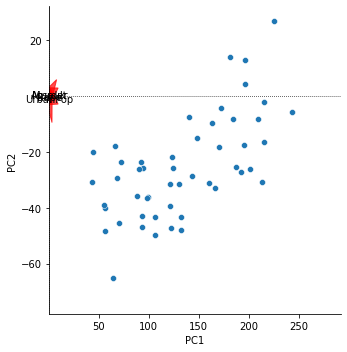

In [200]:
sns.relplot(
            x = "PC1",
            y = "PC2",
            palette = "muted",
            alpha = 1,
            data = results["scores"],
        )
loading_labels = results["loadings"].index

for i in range(results["loadings"].shape[0]):
    print(results["loadings"].iloc[i, 0])
    plt.arrow(
        0, 0,
        results["loadings"].iloc[i, 0],
        results["loadings"].iloc[i, 1],
        color = 'r',
        alpha = 0.7,
        width = 2
    )
    if True:
        plt.text(
            results["loadings"].iloc[i, 0]*1.05,
            results["loadings"].iloc[i, 1]*1.05,
            loading_labels[i],
            color = 'black',
            ha = 'center',
            va = 'center',
            fontsize = 10
        );
scores_loadings = np.vstack([results["scores"].values[:, :2], results["loadings"].values[:, :2]])
xymin = scores_loadings.min(axis=0) * 1.2
xymax = scores_loadings.max(axis=0) * 1.2

plt.axhline(y = 0, color = 'k', linestyle = 'dotted', linewidth=0.75)
plt.axvline(x = 0, color = 'k', linestyle = 'dotted', linewidth=0.75)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(xymin[0], xymax[0])
plt.ylim(xymin[1], xymax[1])
plt.show()

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')